In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
ADC_VBATT_R1 = 110
ADC_VBATT_R2 =  36

In [5]:
def conv( adc ):
    return adc * 1100 * (ADC_VBATT_R1+ADC_VBATT_R2) / ADC_VBATT_R2 / 4095

In [10]:
conv( 4095 )

4461.111111111111

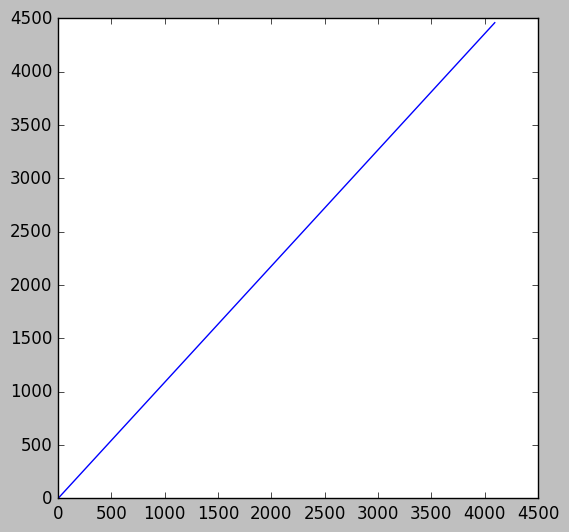

In [9]:
x = range(2**12-1)
y = list( map(conv, x) )
plot(x,y)
axis("square")
display(gcf())
close()

# ADC calibration

/home/mbetz/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


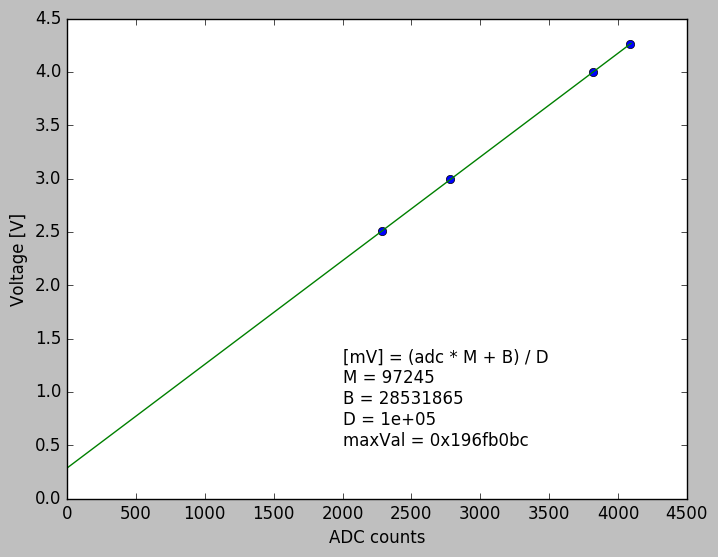

In [104]:
vReal  = [2.504, 2.994, 4.000, 4.258 ]
adcCnt = [ 2286,  2779,  3821,  4086  ]

plot(adcCnt, vReal, "o")
m,b = polyfit(adcCnt, vReal, 1)
y = x*m + b
plot( x, y )
xlabel("ADC counts")
ylabel("Voltage [V]")
D = 1e8
M = int(m*D)
B = int(b*D)
D /= 1000
maxVal = 4095 * M + B
text( 2000, 0.5, "[mV] = (adc * M + B) / D\nM = {:d}\nB = {:d}\nD = {:.0e}\nmaxVal = {:s}".format(M,B,D,hex(maxVal)), ha="left" )
display(gcf())
close()

In [103]:
(4095 * M + B) / D

4274.55901